# Análise de Componentes Principais

Exemplo: Decatlo

Uma base de dados com 41 linhas e 13 colunas: as dez primeiras colunas correspondem ao desempenho dos atletas para as 10 provas do decatlo. As colunas 11 e 12 correspondem respectivamente à classificação e aos pontos obtidos. A última coluna é uma variável categórica correspondente ao evento esportivo (Jogos Olímpicos de 2004 ou Decastar de 2004)

As variáveis são
- 100m (100 metros rasos)
- (salto em distância)
- (arremesso de peso)
- (salto em altura)
- 400m (400 metros rasos)
- (110 metros com barreiras)
- (lançamento de disco)
- (salto com vara)
- (lançamento de dardo)
- 1500m (1500 metros)

Fonte: https://malouche.github.io/data_in_class/decathlon_data.html

1. Analise a matriz de correlações dos dados.
2. Decomponha a matriz de variâncias e covariâncias em componentes principais.
3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?
4. Proponha uma ordenação dos atletas segundo a primeira componente principal.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('decatlon.csv', index_col=0)
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
Athlets,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


1. Analise a matriz de correlações dos dados

Cálculo da matriz de correlações

In [4]:
corr = df.iloc[:,0:9].corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000


Mapa de calor das correlações

<Axes: >

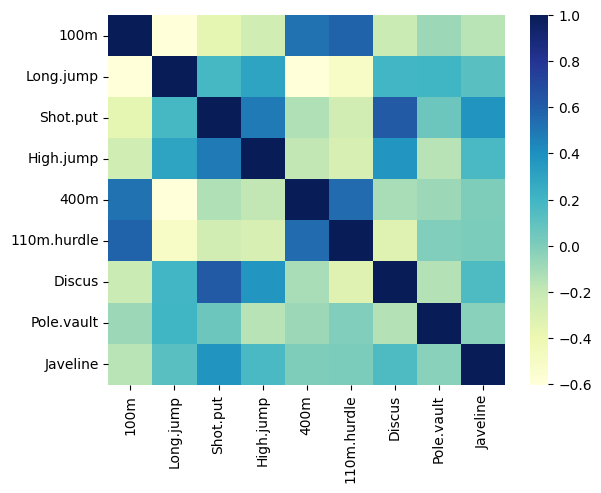

In [7]:

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

2. Decomponha a matriz de variâncias e covariâncias em componentes principais.

In [28]:
X = np.matrix(df.iloc[:,0:10])
X_np = np.asarray(X)
S = np.cov(np.transpose(X))


Variâncias

In [10]:
np.diagonal(S)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01, 1.36264701e+02])

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca

PCA(n_components=5)

In [29]:
pca.fit(X_np)

PCA(n_components=5)

Peso das componentes principais

In [30]:
pca.components_[0,:]

array([-1.28080400e-03, -9.50593693e-04,  8.04474909e-03, -3.21942507e-04,
        3.95670085e-02,  1.26099822e-03,  7.79032346e-02,  5.70956842e-03,
       -8.59485398e-02,  9.92409609e-01])

3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?

Variância das componentes principais

In [33]:
np.round(pca.explained_variance_ratio_,3)

array([0.797, 0.136, 0.058, 0.007, 0.002])

In [35]:
np.round(pca.explained_variance_ratio_.cumsum(),3)

array([0.797, 0.932, 0.99 , 0.996, 0.998])

In [36]:
np.linalg.eig(S)[1][0,:]

array([-0.0012808 , -0.01116462,  0.01483416, -0.15726314, -0.06125175,
       -0.21642654, -0.05063004, -0.86978941,  0.40648664, -0.00115457])

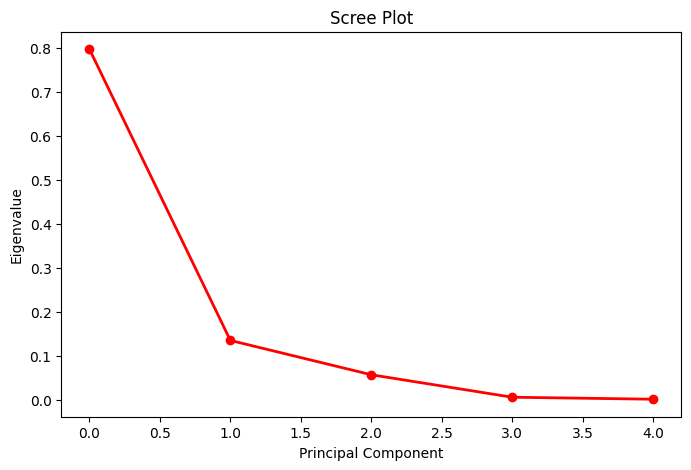

In [37]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [39]:
pca.transform(X_np)

array([[ 1.21268985e+01,  5.31924548e+00, -3.01158938e+00,
        -7.44026954e-01, -8.96719233e-02],
       [ 2.26340062e+01,  4.81860306e+00,  3.47084930e+00,
        -7.29689068e-01,  1.31226354e+00],
       [ 2.20160089e+01, -5.12656310e+00,  4.72748179e+00,
        -1.50142432e+00,  1.81608063e-01],
       [ 3.89697006e-01,  3.37695640e+00, -4.53039879e+00,
        -1.18018344e+00,  6.71183270e-02],
       [-2.85674567e+00,  5.32450428e+00,  6.44553700e-01,
         1.16432891e+00, -2.91117455e-01],
       [-6.44908091e-01, -7.20789283e+00, -1.09038567e+00,
        -1.18096569e+00, -4.75718818e-01],
       [-1.06333738e+01, -3.22716136e+00,  3.10727244e+00,
        -9.47888499e-02,  1.05764718e+00],
       [ 6.20661877e+00, -1.52583169e+00, -6.33039005e-02,
         4.18919760e-02,  6.36405724e-01],
       [-1.60043980e+01, -5.88829246e+00,  6.17694601e+00,
         2.15182512e+00, -1.90274532e-01],
       [ 6.23593762e+00, -5.26675947e-01,  1.54033000e-01,
         1.30010427e+00

Vamos considerar 2 componente principais

In [40]:
pca = PCA(n_components=2)
pca.fit(X_np)

pca.components_

array([[-1.28080400e-03, -9.50593693e-04,  8.04474909e-03,
        -3.21942507e-04,  3.95670085e-02,  1.26099822e-03,
         7.79032346e-02,  5.70956842e-03, -8.59485398e-02,
         9.92409609e-01],
       [-1.11646237e-02,  9.65383661e-03,  8.56736836e-02,
         4.28001111e-03,  9.81124318e-03, -4.91153939e-03,
         2.67357273e-01, -1.11678946e-03,  9.57662014e-01,
         6.08751215e-02]])

In [48]:
np.round(pca.components_[0],3)

array([-0.001, -0.001,  0.008, -0.   ,  0.04 ,  0.001,  0.078,  0.006,
       -0.086,  0.992])

In [50]:
np.round(pca.components_[1],3)

array([-0.011,  0.01 ,  0.086,  0.004,  0.01 , -0.005,  0.267, -0.001,
        0.958,  0.061])

In [42]:
PCA1 = pca.transform(X_np)[:,0]
PCA2 = pca.transform(X_np)[:,1]

In [43]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2

In [44]:
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,12.126899,5.319245
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,22.634006,4.818603
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,22.016009,-5.126563
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,0.389697,3.376956
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,-2.856746,5.324504


4. Proponha uma ordenação dos atletas segundo a primeira componente principal

In [49]:
df.sort_values(by='PCA1', ascending=True)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.50,58.36,263.08,24,7592,OlympicG,-16.168862,-2.144554
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar,-16.004398,-5.888292
Smirnov,10.89,7.07,13.88,1.94,49.11,14.77,42.47,4.70,60.88,263.31,17,7993,OlympicG,-15.985132,0.944486
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,OlympicG,-14.518756,-1.313223
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,OlympicG,-13.218942,0.488027
NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,12,7651,Decastar,-12.785561,-3.473269
Barras,11.14,6.99,14.91,1.94,49.41,14.37,44.83,4.60,64.55,267.09,13,8067,OlympicG,-12.346567,5.409876
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar,-10.633374,-3.227161
Gomez,11.08,7.26,14.57,1.85,48.61,14.41,40.95,4.40,60.71,269.70,22,7865,OlympicG,-9.764231,0.819932
